In [1]:
# Custom styling, borrowed from https://github.com/ellisonbg/talk-2013-scipy

from IPython import display


# Make plots centered. H/T to http://stackoverflow.com/a/27168595/1068170
STYLE = """\
<style>
div.output_area, .ui-wrapper {
  margin-left: auto !important;
  margin-right: auto !important;
}
</style>
"""


SLIDES_STYLE = """
<style>

h1.bigtitle {
    margin: 4cm 1cm 4cm 1cm;
    font-size: 300%;
}

h1.title { 
    font-size: 250%;
}

.rendered_html h1 {
    margin: 0.25em 0em 0.5em;
    color: #015C9C;
    text-align: center;
    line-height: 1.2; 
    page-break-before: always;
}
</style>
"""

STYLE = STYLE + '\n' + SLIDES_STYLE

display.display(display.HTML(STYLE))

$$u_t + \left[f(u)\right]_x = 0$$

<h1 class="bigtitle">Finite Volume</h1>

$$w(x, t) = \frac{1}{\Delta x} \int_{x - \Delta x / 2}^{x + \Delta x / 2} u(s, t) \, ds$$

$$\begin{align*}
w_t &= \frac{1}{\Delta x} \int_{x - \Delta x / 2}^{x + \Delta x / 2} u_t \, ds \\
&= \frac{1}{\Delta x} \int_{x - \Delta x / 2}^{x + \Delta x / 2} -\left[f(u)\right]_s \, ds \\
&= -\frac{f\left(u\left(x + \Delta x / 2, t\right)\right) - f\left(u\left(x - \Delta x / 2, t\right)\right)}{\Delta x}
\end{align*}$$

$$\begin{align*}
u_j^n &= u\left(j \Delta x, n \Delta t\right) \\
w_j^n &= w\left(j \Delta x, n \Delta t\right)
\end{align*}$$

$$\frac{d}{dt} w_j^n = -\frac{1}{\Delta x}\left(f\left(u_{j + \frac{1}{2}}\right) - f\left(u_{j - \frac{1}{2}}\right)\right)$$

$$\left\{w_j^n\right\}_j \overset{?}{\longrightarrow} \left\{u_{j + 1/2}^n\right\}_j$$

> WENO interpolation ... [is] used ... to transfer information from one domain to another in a high order, nonoscillatory fashion

![WENO Transfer Quote](weno_transfer_quote.jpg "WENO Paper Quote")

<h1 class="bigtitle">Finite Difference</h1>

$$\frac{d}{dt} u_j^n = -\frac{1}{\Delta x}\left(\widehat{f}_{j + \frac{1}{2}} - \widehat{f}_{j - \frac{1}{2}}\right)$$

Define $h(x)$ implicitly via
$$\frac{1}{\Delta x} \int_{x - \Delta x / 2}^{x + \Delta x / 2} h(s) \, ds = f(u(x))$$

$$\frac{1}{\Delta x} \int_{x - \Delta x / 2}^{x + \Delta x / 2} h(s) \, ds = f(u(x))$$

$$\Longrightarrow \frac{1}{\Delta x} \left(h\left(x_{j + \frac{1}{2}}\right) -h\left(x_{j - \frac{1}{2}}\right)\right) = \left[f(u)\right]_x$$

$$\Longrightarrow \frac{1}{\Delta x} \left(h\left(x_{j + \frac{1}{2}}\right) -h\left(x_{j - \frac{1}{2}}\right)\right) \approx \frac{1}{\Delta x}\left(\widehat{f}_{j + \frac{1}{2}} - \widehat{f}_{j - \frac{1}{2}}\right)$$

$$\widehat{f}_{j + \frac{1}{2}} = h\left(x_{j + \frac{1}{2}}\right) = h_{j + \frac{1}{2}}$$

$$\overline{h}_j^n = \frac{1}{\Delta x} \int_{x - \Delta x / 2}^{x + \Delta x / 2} h(s) \, ds = f\left(u_j^n\right)$$

$$\left\{\overline{h}_j^n\right\}_j \overset{?}{\longrightarrow} \left\{h_{j + \frac{1}{2}}^n\right\}_j$$

In [2]:
%matplotlib inline

import seaborn
import sympy

import weno_computations

seaborn.set_palette('husl')

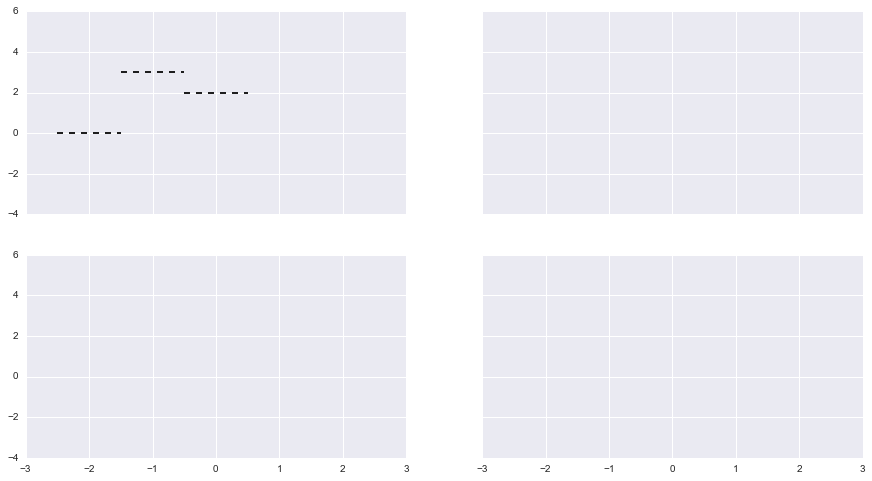

In [3]:
weno_computations.make_intro_plots(0)

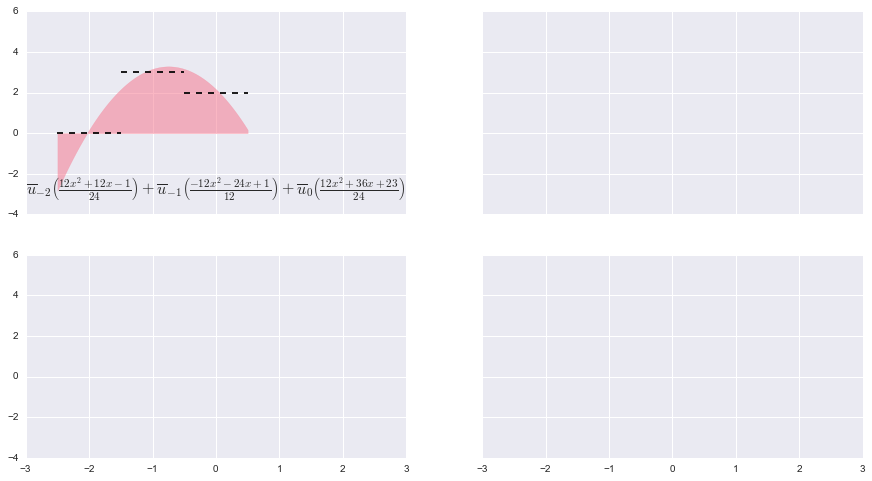

In [4]:
weno_computations.make_intro_plots(1)

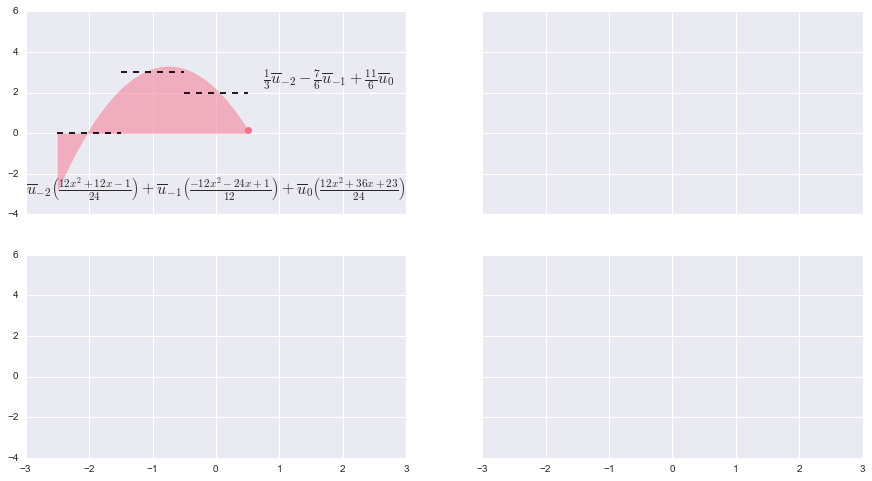

In [5]:
weno_computations.make_intro_plots(2)

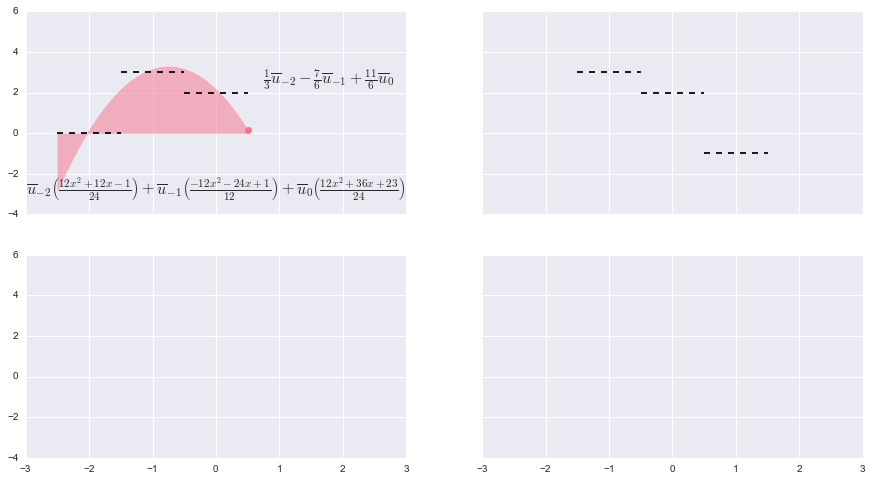

In [6]:
weno_computations.make_intro_plots(3)

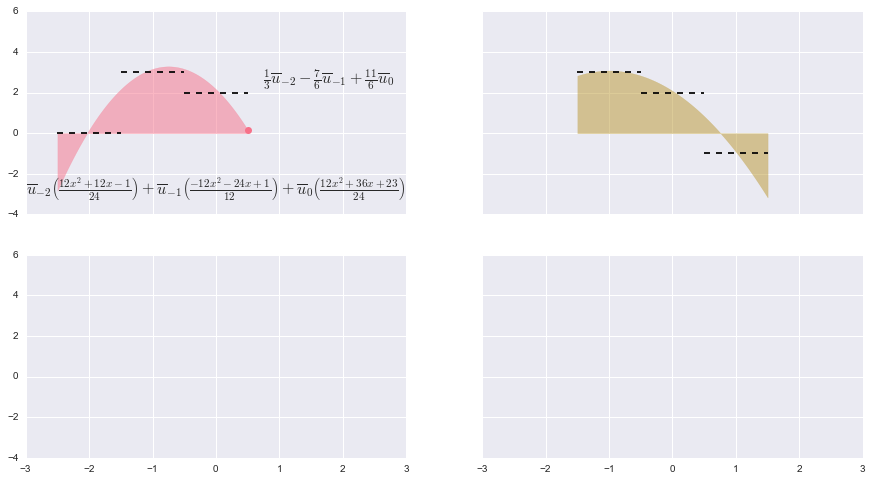

In [7]:
weno_computations.make_intro_plots(4)

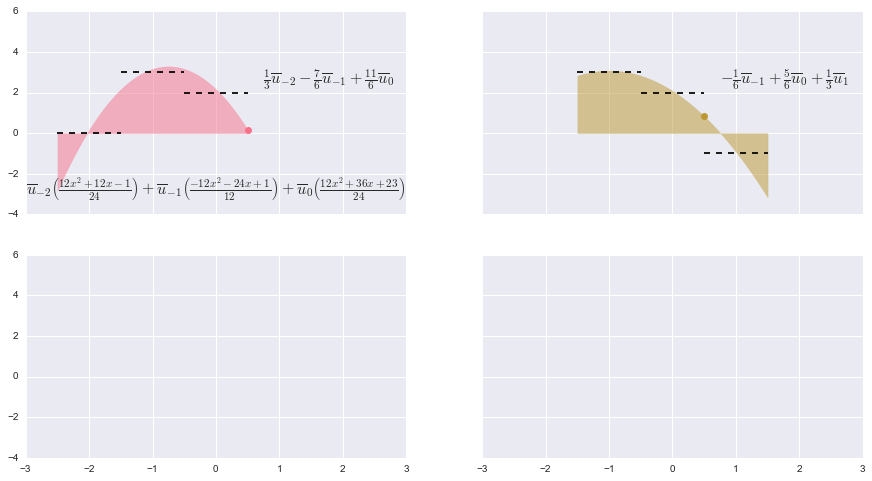

In [8]:
weno_computations.make_intro_plots(5)

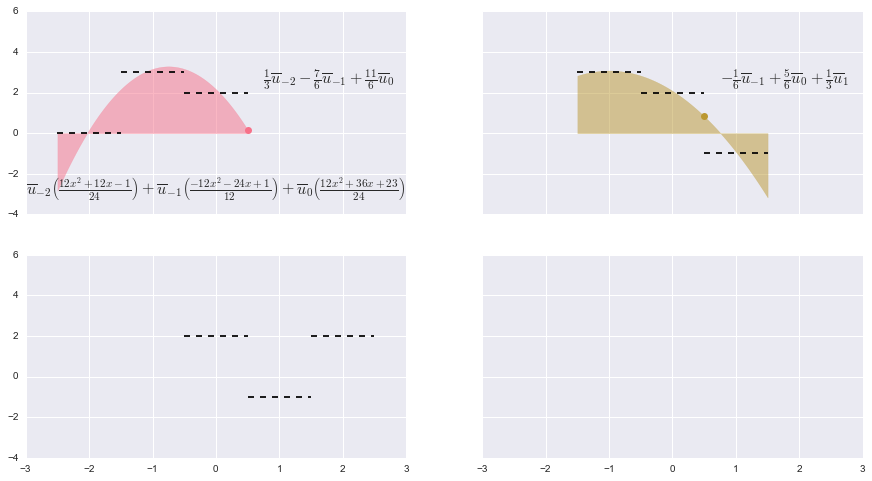

In [9]:
weno_computations.make_intro_plots(6)

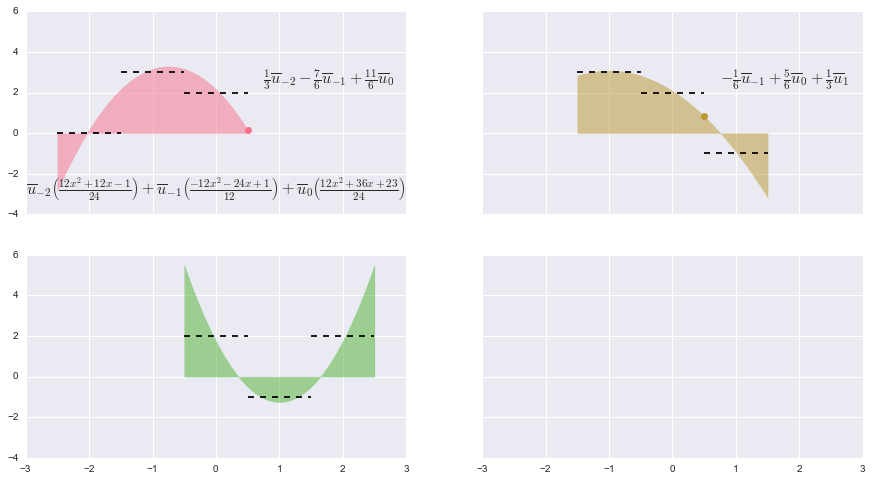

In [10]:
weno_computations.make_intro_plots(7)

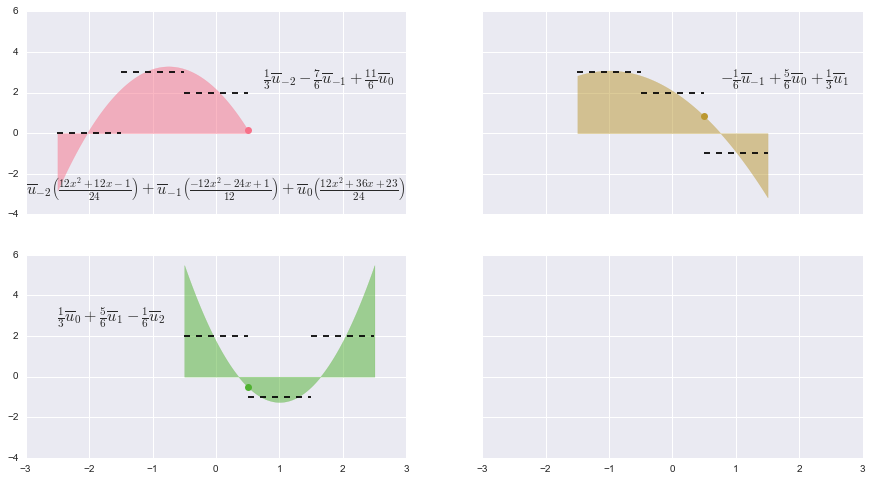

In [11]:
weno_computations.make_intro_plots(8)

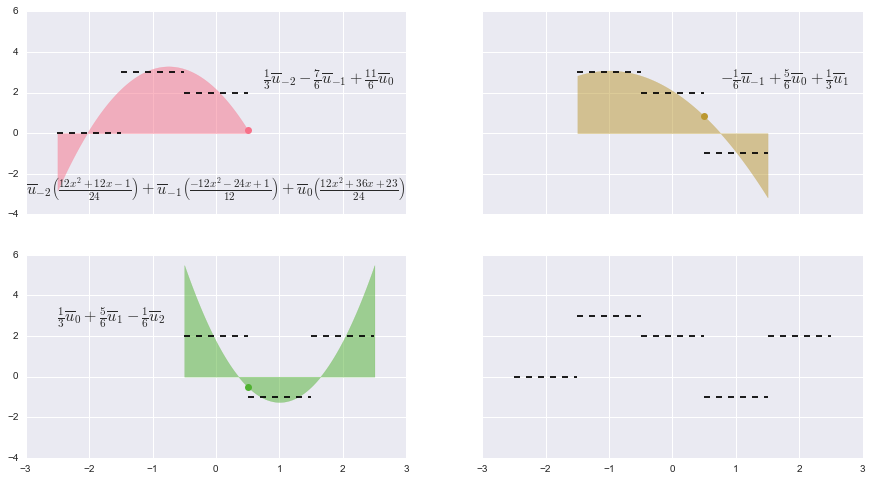

In [12]:
weno_computations.make_intro_plots(9)

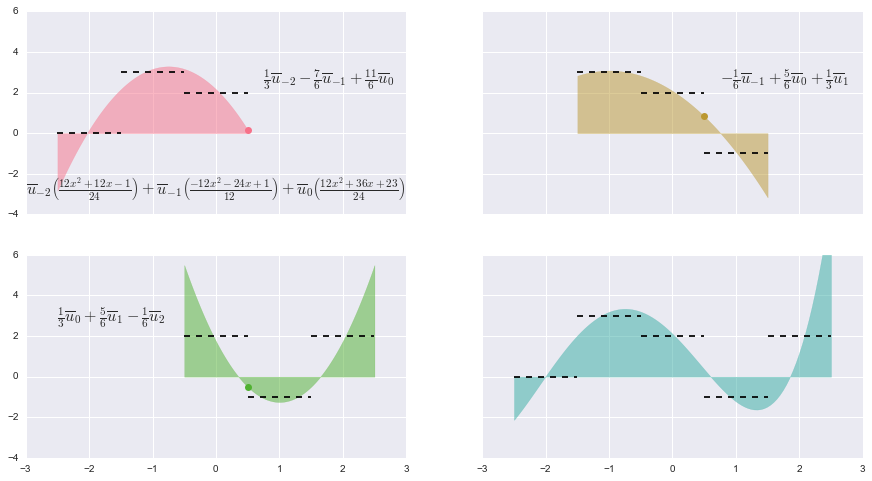

In [13]:
weno_computations.make_intro_plots(10)

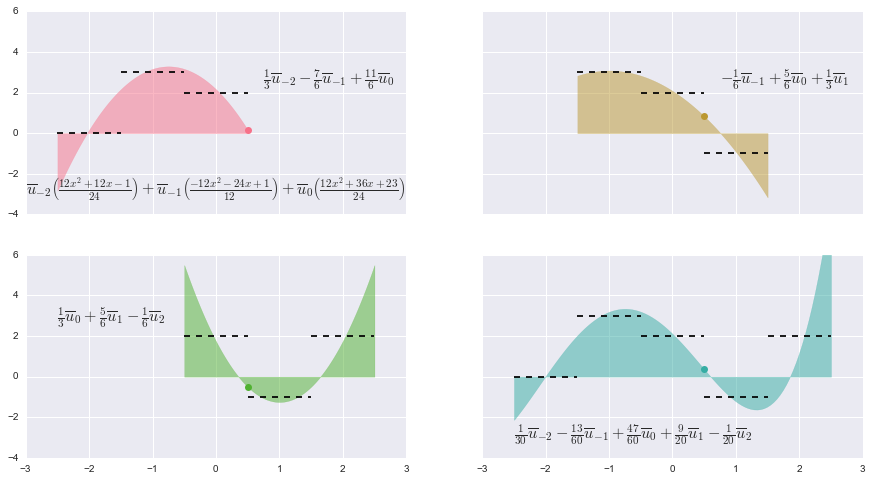

In [14]:
weno_computations.make_intro_plots(11)

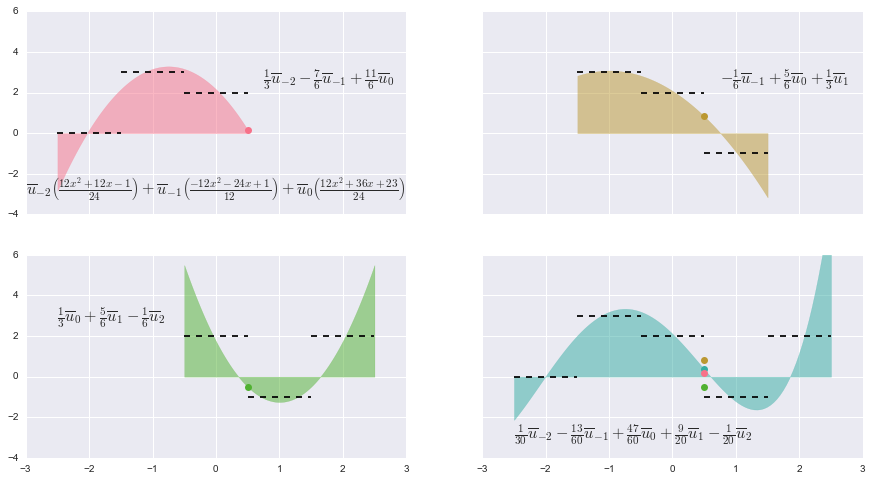

In [15]:
weno_computations.make_intro_plots(12)

In [16]:
# The slide below can be produced with the following:
(approx_minus2, approx_minus1, 
 approx_zero, approx_all) = weno_computations.interp_simple_stencils()

approx_minus2 = approx_minus2.replace('=', '&=')
approx_minus1 = approx_minus1.replace('=', '&=')
approx_zero = approx_zero.replace('=', '&=')
approx_all = approx_all.replace('=', '&=')

all_math = r"""\begin{align*}
%s \\ %s \\ %s \\ %s \end{align*}
""" % (approx_minus2, approx_minus1, approx_zero, approx_all)

$$u^{{(1)}}_{{j + \frac{1}{2}}} = \frac{1}{3}\overline{u}_{j-2} - \frac{7}{6}\overline{u}_{j-1} + \frac{11}{6}\overline{u}_{j}$$

$$u^{{(2)}}_{{j + \frac{1}{2}}} = -\frac{1}{6}\overline{u}_{j-1} + \frac{5}{6}\overline{u}_{j} + \frac{1}{3}\overline{u}_{j+1}$$

$$u^{{(3)}}_{{j + \frac{1}{2}}} = \frac{1}{3}\overline{u}_{j} + \frac{5}{6}\overline{u}_{j+1} - \frac{1}{6}\overline{u}_{j+2}$$

$$u^{{(\ast)}}_{{j + \frac{1}{2}}} = \frac{1}{30}\overline{u}_{j-2} - \frac{13}{60}\overline{u}_{j-1} + \frac{47}{60}\overline{u}_{j} + \frac{9}{20}\overline{u}_{j+1} -\frac{1}{20}\overline{u}_{j+2}$$

$$\frac{1}{3}\overline{u}_{j-2} - \frac{7}{6}\overline{u}_{j-1} + \frac{11}{6}\overline{u}_{j} = u\left(x_{j + \frac{1}{2}}\right) - \frac{\Delta x^3 u_0'''}{4} + \mathcal{O}\left(\Delta x^4\right)$$

$$-\frac{1}{6}\overline{u}_{j-1} + \frac{5}{6}\overline{u}_{j} + \frac{1}{3}\overline{u}_{j+1} = u\left(x_{j + \frac{1}{2}}\right) + \frac{\Delta x^3 u_0'''}{12} + \mathcal{O}\left(\Delta x^4\right)$$

$$\frac{1}{3}\overline{u}_{j} + \frac{5}{6}\overline{u}_{j+1} - \frac{1}{6}\overline{u}_{j+2} = u\left(x_{j + \frac{1}{2}}\right) - \frac{\Delta x^3 u_0'''}{12} + \mathcal{O}\left(\Delta x^4\right)$$

$$u^{{(\ast)}}_{{j + \frac{1}{2}}} = u\left(x_{j + \frac{1}{2}}\right) - \frac{\Delta x^5 u_0'''}{60} + \mathcal{O}\left(\Delta x^6\right)$$

$$\left(\Delta x\right) \overline{u} = \int_a^b u(x) \, dx = u_0(b - a) + u_0' \left(\frac{b^2 - a^2}{2}\right) + u_0'' \left(\frac{b^3 - a^3}{6}\right) + \cdots$$

Putting the **W** in **WENO**:
$$u^{{(\ast)}}_{{j + \frac{1}{2}}} = \frac{1}{10} u^{{(1)}}_{{j + \frac{1}{2}}} + \frac{6}{10} u^{{(2)}}_{{j + \frac{1}{2}}} + \frac{3}{10} u^{{(3)}}_{{j + \frac{1}{2}}}$$

What about shocks?

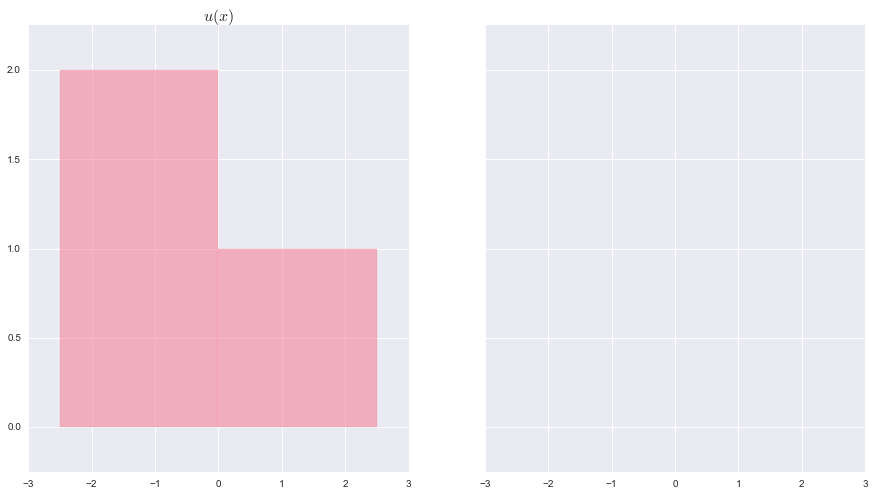

In [17]:
weno_computations.discontinuity_to_volume(0)

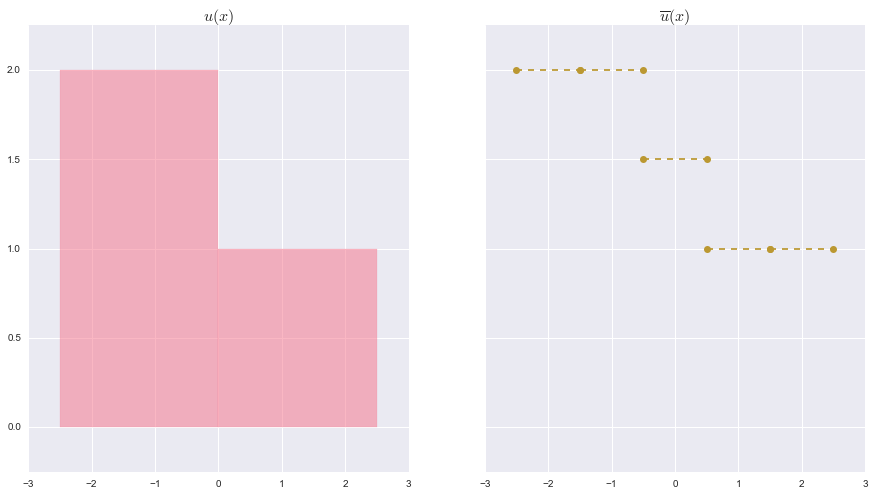

In [18]:
weno_computations.discontinuity_to_volume(1)

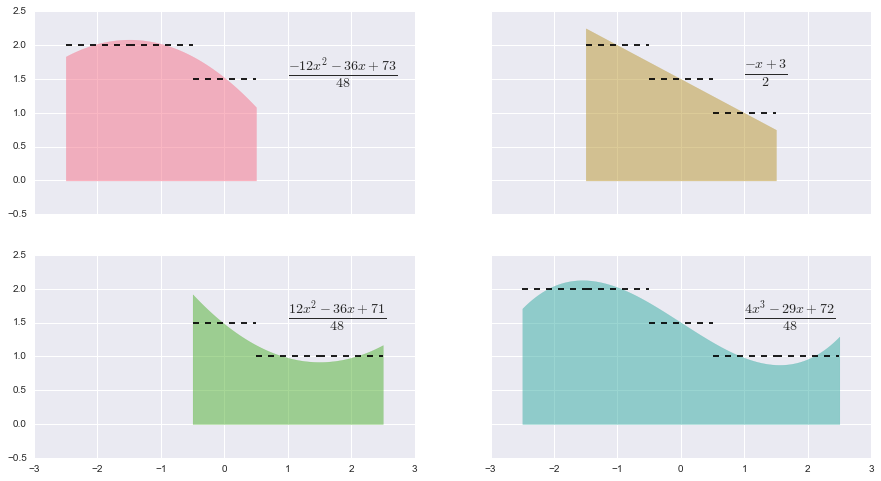

In [19]:
weno_computations.make_shock_plot()

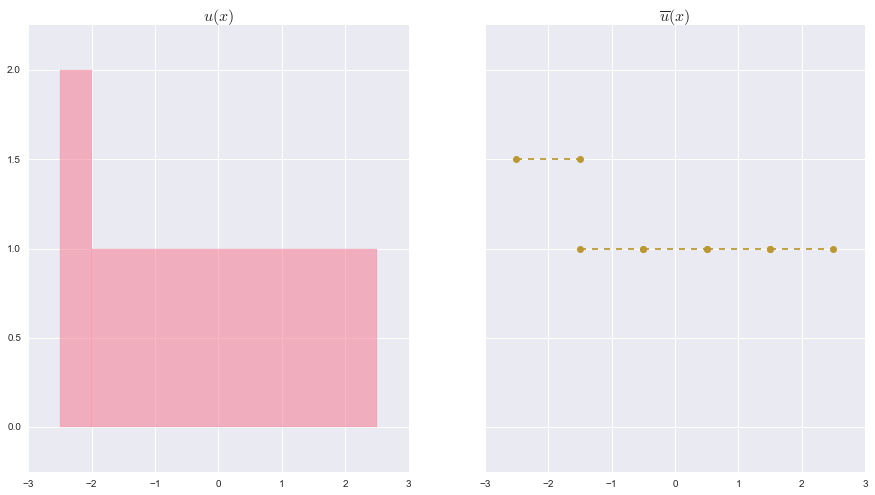

In [20]:
weno_computations.discontinuity_to_volume_single_cell()

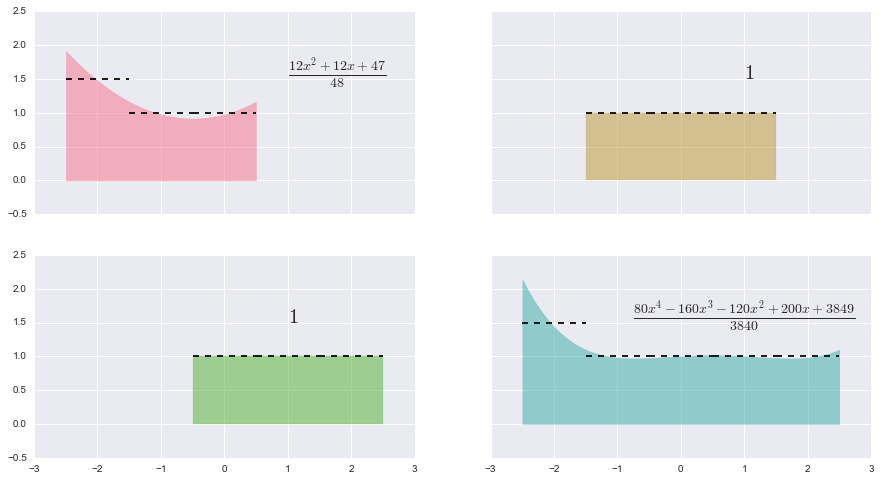

In [21]:
weno_computations.make_shock_plot_single_cell()

The TVD-diminishing RK scheme

$$\begin{array}{c | c c c}
  0 &     &     &   \\
  1 &   1 &     &   \\
1/2 & 1/4 & 1/4 &   \\
\hline
    & 1/6 & 1/6 & 2/3
\end{array}$$

when applied to a linear problem $u' = \lambda u$ gives
$$\begin{align*}
k_1 &= \lambda u \\
k_2 &= \lambda \left(u + \Delta t k_1\right) = \left(\lambda + \lambda^2 \Delta t\right) u \\
k_3 &= \lambda \left(u + \frac{\Delta t}{4} k_1 + \frac{\Delta t}{4} k_2\right) =
\left(\lambda + \frac{\lambda^2 \Delta t}{2} + \frac{\lambda^3 (\Delta t)^2}{4}\right)u \\
u^{\text{new}} &= u + \frac{\Delta t}{6}\left(k_1 + k_2 + 4 k_3\right) =
\left(1 + z + \frac{z}{2} + \frac{z^3}{6}\right)u
\end{align*}$$